In [100]:
from bs4 import BeautifulSoup
import requests
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import pygraphviz
import numpy as np
import pickle

%matplotlib inline

In [90]:
link = 'http://164.100.47.194/Loksabha/Debates/DebateAdvSearch15.aspx'
contents = requests.get(link).content
soup = BeautifulSoup(contents, 'html.parser')

In [91]:
types_of_debates = {}

records = soup.find('select', id = 'ContentPlaceHolder1_ddldebtype')
for option in records.find_all('option'):
    types_of_debates[option.text] = option['value']
    
types_of_debates.pop('--- Select Debate Type ---', None)

'--- Select Debate Type ---'

In [92]:
types_of_debates

{'ADDRESS BY THE CHAIR (RULE - 360)': '66',
 'ADJOURNMENT MOTION': '1',
 'ANNOUNCEMENT BY THE CHAIR': '2',
 'ARREST OF MEMEBRS': '57',
 'ASSENT TO BILLS': '3',
 'BUDGET (GENERAL)': '4',
 'BUDGET (RAILWAYS)': '6',
 'BUDGET (STATES)': '5',
 'BUSINESS OF HOUSE': '7',
 'CALLING ATTENTION (RULE-197)': '8',
 'DECISION BY THE CHAIR': '12',
 'DISCUSSION ON SPECIAL SITTING': '67',
 'ELECTION OF SPEAKER/DY. SPEAKER': '58',
 'ELECTION TO COMMITTEES/BOARDS': '59',
 'EXPULSION FROM MEMBERSHIP OF LOK SABHA': '0',
 'FELICITATIONS': '13',
 'GOVERNMENT BILLS': '14',
 'GOVERNMENT MOTION': '15',
 'GOVERNMENT RESOLUTIONS': '16',
 'HALF-AN-HOUR DISCUSSIONS (RULE-55)': '17',
 'INTRODUCTION OF MINISTERS': '19',
 'INTRODUCTION OF PARLIAMENTARY DELEGATIONS': '56',
 'LEAVE OF ABSENCE': '20',
 'MATTERS UNDER RULE-377': '21',
 'MESSAGES FROM PRESIDENT': '23',
 'MESSAGES FROM RAJYA SABHA': '24',
 "MOTION OF THANKS ON THE PRESIDENT'S ADDRESS": '26',
 'MOTION TO CONSIDER POLICY, SITUATION, STATEMENT OR ANY OTHER MAT

In [93]:
debate_graphs = {}
for key in types_of_debates:
    debate_graphs[key] = {}

In [94]:
debate_name = 'CALLING ATTENTION (RULE-197)'
f = open('../Data/Debates/' + debate_name + '.htm')
contents = f.read()
soup = BeautifulSoup(contents, 'html.parser')

In [95]:
records = soup.find_all('td')
filtered_records = [rec.find_next_sibling('td') for rec in records if 'Participants:' in rec.text]
debate_participants = []

for rec in filtered_records:
    current_participants = rec.find_all('a')
    debate_participants.append(set([p.text for p in current_participants]))
    
print(debate_participants)

[{'Singh Kunwar  Ratanjeet Pratap Narayan ', 'Ray Shri Bishnu Pada'}, {'Acharia Shri Basudeb', 'Sharma  Shri   Anand', 'Ray Shri Saugata'}, {'Punia Shri P.L. ', 'Kishor Shri Kamal ', 'Dhanaplan Shri K. P.', 'Baalu Thiru Thalikkottai Rajuthevar', 'Mahant Dr. Charan Das', 'Dhruvanarayana Shri R. ', 'Ponnam Shri Prabhakar', 'Raghavan Shri M. K.', 'Chitthan Shri N.S.V.', 'Dias Dr.   Charles', 'Ramasubbu Shri  S.S.', 'Shivaramagouda Shri  ', 'Mani Shri Jose K.'}, {'Dome Dr. Ram Chandra', 'Meghwal Shri Arjun Ram ', 'Rao Shri Nama Nageswara', 'Dastidar   Kakli Ghosh', 'Azad Shri   Ghulam Nabi', 'Kumar Shri Shailendra'}, {'Ramesh Shri   Jairam', 'Ola Shri Sheesh Ram'}, {'Ananth Kumar Shri ', 'Chanabasappa Shri Udasi Shivkumar', 'Rawat Shri Harish Chandra Singh', 'Kumar Shri Shailendra', 'Shivaramagouda Shri  ', 'Joshi Shri Pralhad Venkatesh'}, {'Singh Dr. Raghuvansh Prasad', 'Chidambaram Shri Palaniappan', 'Pal  Shri Jagdambika', 'Kumar Shri Shailendra', 'Singh Shri  Umashanker'}, {'Mukherjee 

In [54]:
G = nx.Graph()
nodes = set([])

for rec in debate_participants:
    for p in rec:
        nodes.add(p)
        
nodes = list(nodes)
        
G.add_nodes_from(nodes)

In [55]:
edge_weights = {}

for rec in debate_participants:
    for p1 in rec:
        for p2 in rec:
            if p1 == p2:
                continue
            if (p1, p2) in edge_weights:
                edge_weights[(p1, p2)] += 0.5 # 0.5 because each edge will be encountered twice
            elif (p2, p1) in edge_weights:
                edge_weights[(p2, p1)] += 0.5
            else:
                edge_weights[(p1, p2)] = 0.5
                
edges = []

for e in edge_weights:
    edges.append((e[0], e[1], edge_weights[e]))

In [80]:
G.add_weighted_edges_from(edges)

/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


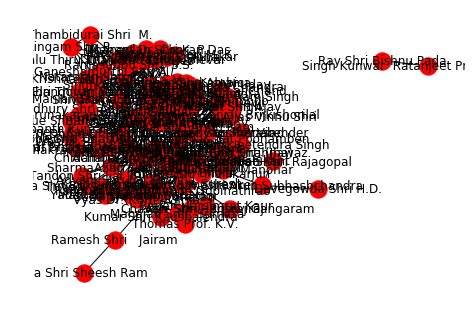

In [86]:
positions = graphviz_layout(G)

nx.draw(G, positions, with_labels = True)

#nx.draw_graphviz(G, with_labels = True, layout = 'random_layout')
plt.savefig('interaction_graph.png')

In [87]:
nx.write_graphml(G, 'network.graphml')

In [104]:
f = open('candidates_parties.pickle', 'rb')
candidate_party_map = pickle.load(f)
f.close()

In [134]:
nodes_split = []
candidates_split = []

for rec in nodes:
    name = rec.split()
    if 'Shri' in name:
        name.remove('Shri')
    elif 'Smt.' in name:
        name.remove('Smt.')
    elif 'Dr.' in name:
        name.remove('Dr.')
    name.sort()
    nodes_split.append(name)
    
for rec in candidate_party_map:
    name = rec.split()
    if 'Dr.' in name:
        name.remove('Dr.')
    name.sort()
    candidates_split.append(name)
    
#nodes_split = set(nodes_split)
#candidates_split = set(candidates_split)

106
['Kaushalendra', 'Kumar']	['Kumar', 'Singh', 'Vijay']		0.3333333333333333
['Kaushalendra', 'Kumar']	['Hansdak', 'Kumar', 'Vijay']		0.3333333333333333
['Kaushalendra', 'Kumar']	['.M', 'Kumar', 'Udhaya']		0.3333333333333333
['Kaushalendra', 'Kumar']	['Kumar', 'Raj', 'Saini']		0.3333333333333333
['Kaushalendra', 'Kumar']	['Dharmendra', 'Kumar']		0.5
['Kaushalendra', 'Kumar']	['Birendra', 'Chaudhary', 'Kumar']		0.3333333333333333
['Kaushalendra', 'Kumar']	['Kumar', 'Raj', 'Singh']		0.3333333333333333
['Kaushalendra', 'Kumar']	['(Dr.)', 'Balyan', 'Kumar', 'Sanjeev']		0.25
['Kaushalendra', 'Kumar']	['Ashwini', 'Choubey', 'Kumar']		0.3333333333333333
['Kaushalendra', 'Kumar']	['Kumar', 'Patasani', 'Prasanna']		0.3333333333333333
['Kaushalendra', 'Kumar']	['Kumar', 'Singh', 'Sunil']		0.3333333333333333
['Kaushalendra', 'Kumar']	['Kumar', 'Singh', 'Sushil']		0.3333333333333333
['Kaushalendra', 'Kumar']	['Kumar', 'Pandey', 'Ravindra']		0.3333333333333333
['Kaushalendra', 'Kumar']	['Kumar', '